<a href="https://colab.research.google.com/github/AidanNG/Stock-Market-Predictor/blob/main/predictor_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this predictor, we use an LSTM to predict the closing stock price of a specific corporation using the data of the past 60 days of stock prices.

In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Get the stock quote
from datetime import datetime
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()
symbol = "AAPL"
today = pd.to_datetime("today")  # Ensures today's date
start_date = datetime(2012,1,1)
end_date = today

# Retrieve historical data
df = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433829,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500648,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639428,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771558,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400
...,...,...,...,...,...,...
2024-04-16,171.750000,173.759995,168.270004,169.380005,169.380005,73711200
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200
2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900


In [5]:
#Get the number of rows and columns in the data set
df.shape

(3095, 6)

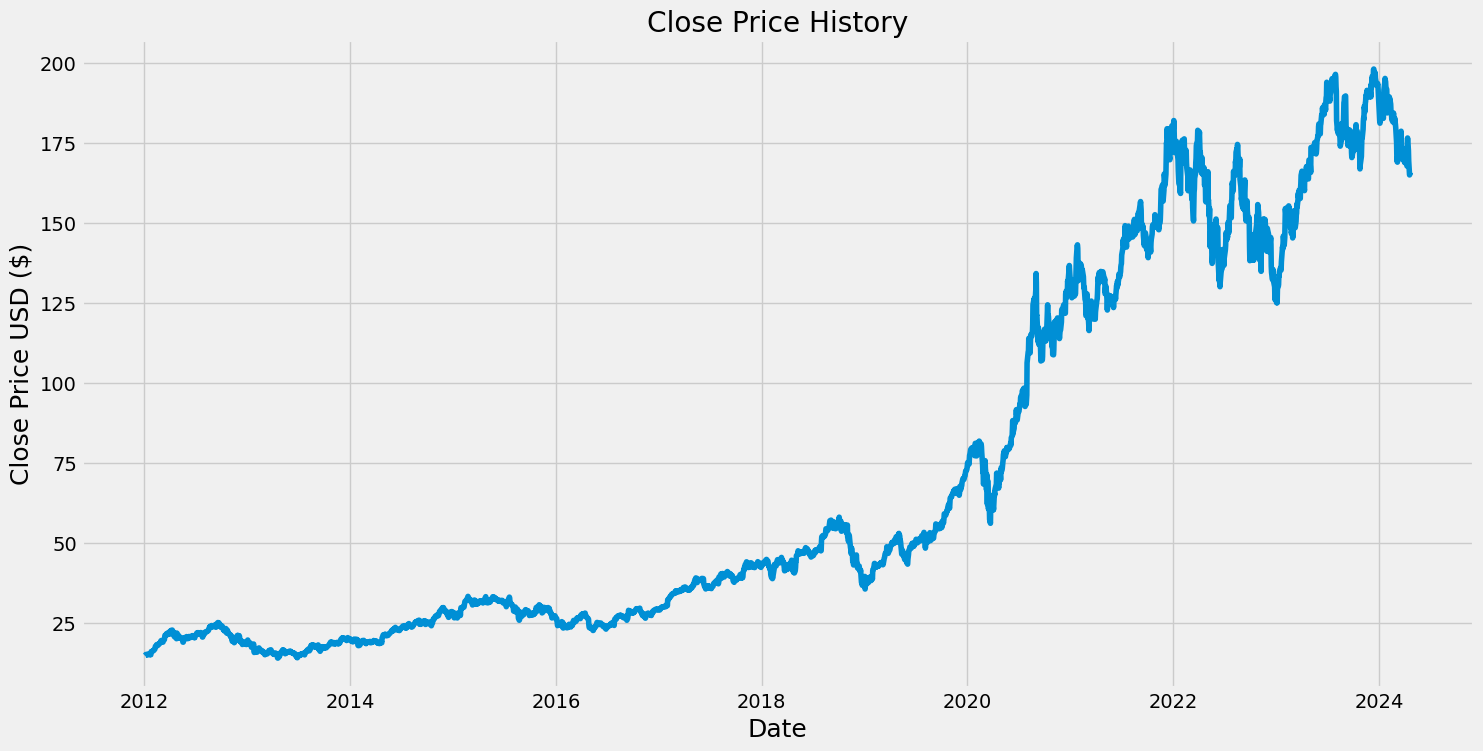

In [6]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Convert the datafrme to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
print(training_data_len)

2476


In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.83129026],
       [0.82021312],
       [0.82477429]])

In [9]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data set into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
      print(x_train)
      print(y_train)
      print()

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [10]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2416, 60, 1)

In [12]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2416/2416 [==============================] - 96s 38ms/step - loss: 6.8612e-04


In [16]:
#Create the testing data set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [17]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
#Reshape the data to 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


20/20 [==============================] - 1s 20ms/step


In [20]:
#Evaluate the Mode: Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

1.183364560030196

<ipython-input-21-c4c8912d2216>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


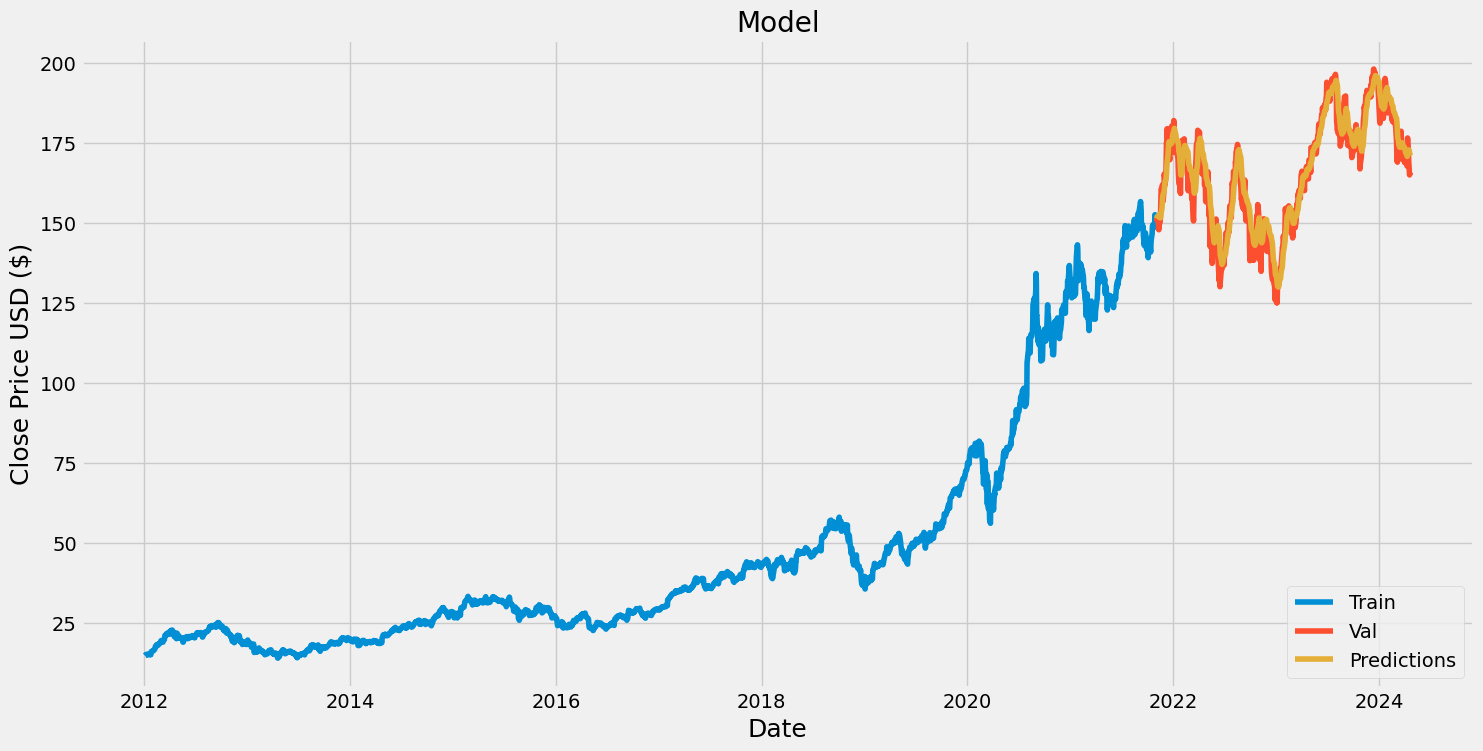

In [21]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
#Show the valid or actual price and the predicted prices
valid

,Close,Predictions
Date,,
2021-11-03,151.490005,151.373901
2021-11-04,150.960007,151.660767
2021-11-05,151.279999,151.913940
2021-11-08,150.440002,152.162979
2021-11-09,150.809998,152.292252
...,...,...
2024-04-16,169.380005,172.752060
2024-04-17,168.000000,172.821503
2024-04-18,167.039993,172.498077


In [23]:
#Try to predict the closing price for the next day
#Get the quote
apple_quote = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days of closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)\
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 33ms/step
[[170.25867]]


In [24]:
#Get the quote
apple_quote2 = pdr.get_data_yahoo(symbol, start=end_date, end=end_date)
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: Exception("%ticker%: Data doesn't exist for startDate = 1713868338, endDate = 1713868338")


Series([], Name: Close, dtype: float64)
